# Multi layer perceptron - MNIST

In [20]:
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

### 1. Load data

In [5]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [6]:
mnist.target[0]

'5'

In [7]:
mnist.target = mnist.target.astype(np.int8)

In [9]:
X = mnist.data / 255  # Normalize values from 0-255 to [0,1]
y = mnist.target

In [10]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
y[0]

5

The label of the image is 5.


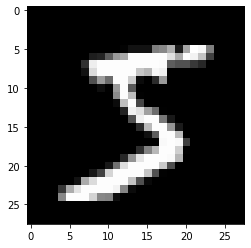

In [13]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("The label of the image is {:.0f}.".format(y[0]))

### 2. Split into train and test data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

### Multi layer perceptron classifier

In [19]:
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [21]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [31]:
def train(epoch):
    model.train()  # set training mode

    # Get a mini batch from the dataloader, and train
    for data, targets in loader_train:

        optimizer.zero_grad()  # gradient to 0
        outputs = model(data)  # input data, and calculate the output
        loss = loss_fn(outputs, targets)  # calculate the differences between data and output
        loss.backward()  # back propagation
        optimizer.step()  # update the weight using the results from back propagation

    print("epoch: {}\n".format(epoch))

In [32]:
def test():
    model.eval()  # set evaluation mode
    correct = 0

    # Get a mini batch from the dataloader, and test
    with torch.no_grad():  # differentiation no needed
        for data, targets in loader_test:

            outputs = model(data)  # input data, and calculate the output

            # calculate prediction
            _, predicted = torch.max(outputs.data, 1)  # get the label with the highest probability
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # count if correctly predicted

    # print the accuracy
    data_num = len(loader_test.dataset)  # Total number of data
    print('\nPrediction accuracy on test data: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [33]:
test()


Prediction accuracy on test data: 9483/10000 (95%)



In [34]:
for epoch in range(3):
    train(epoch)

test()

epoch: 0

epoch: 1

epoch: 2


Prediction accuracy on test data: 9633/10000 (96%)



Prediction : 7
The label of the image is: 7


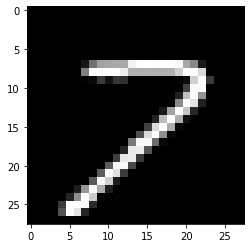

In [40]:
index = 206

model.eval()  # set evaluation mode
data = X_test[index]
output = model(data)  # input data, and calculate the output
_, predicted = torch.max(output.data, 0)  # get the label with the highest probability

print("Prediction : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("The label of the image is: {:.0f}".format(y_test[index]))
